(60000, 784)
(10000, 784)


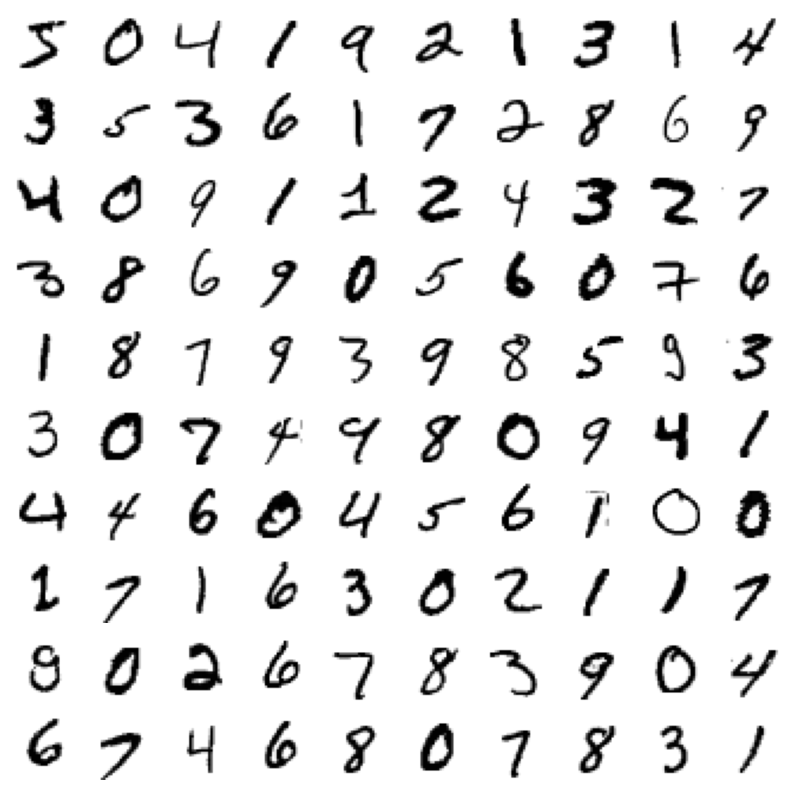

Explained variance ratio of the first two principal components: [0.09704664 0.07095924]


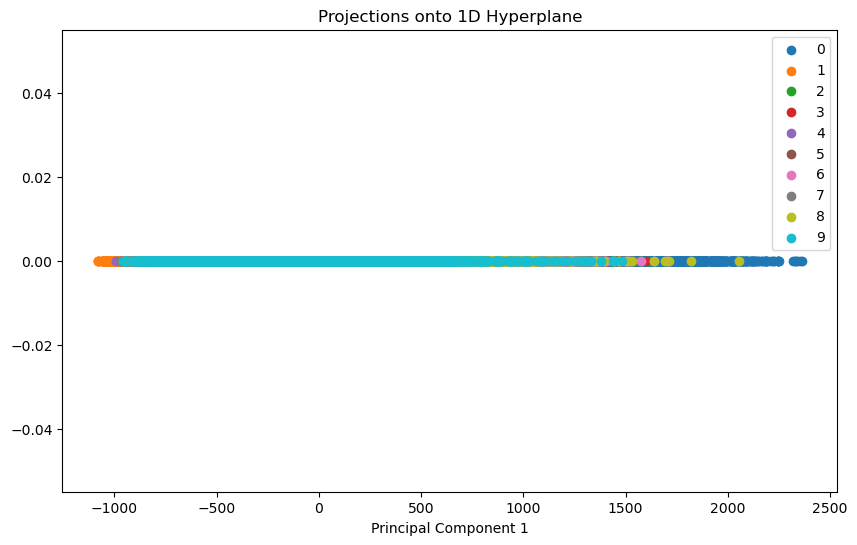

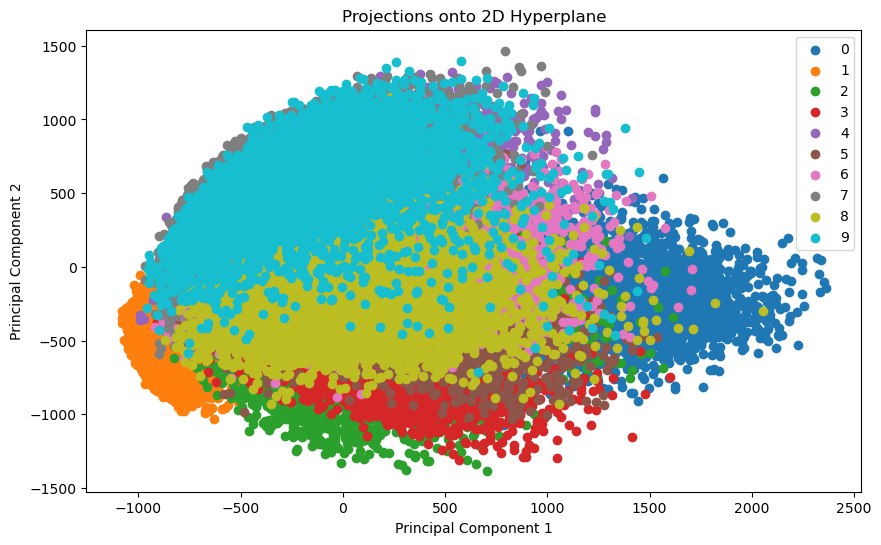

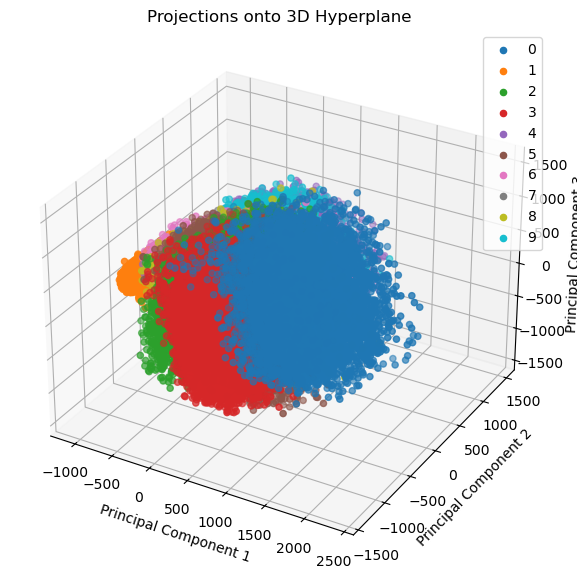

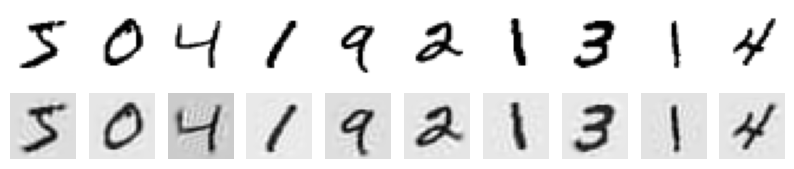

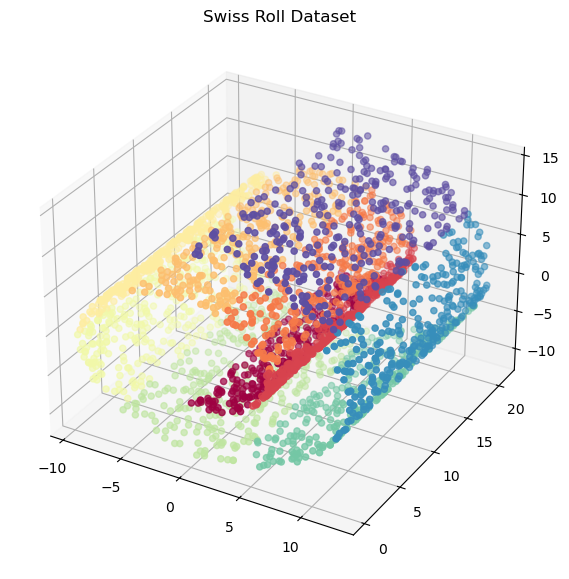

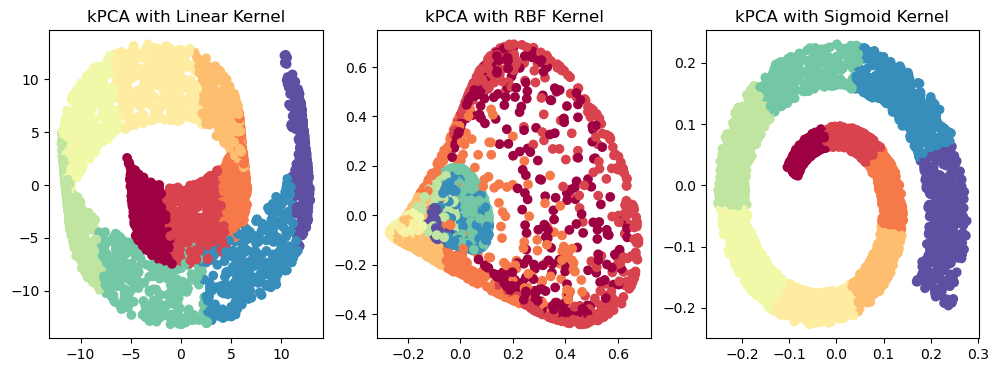

Best parameters found by GridSearchCV: {'kpca__gamma': 0.01, 'kpca__kernel': 'sigmoid'}


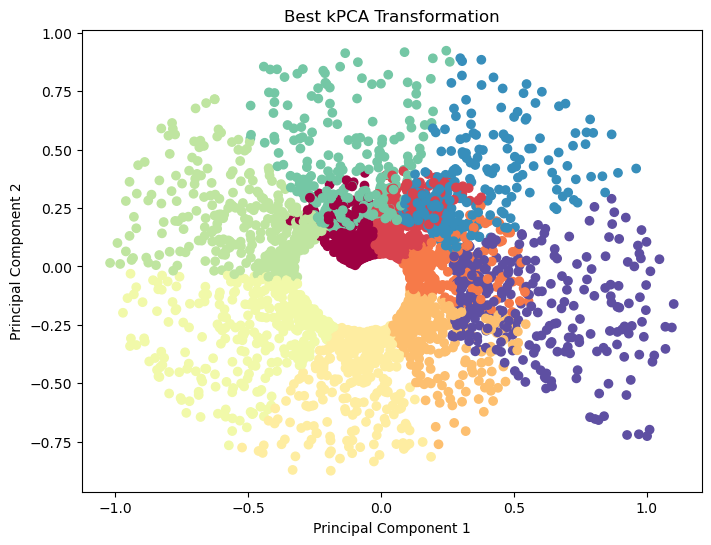

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Friday Sep 20 2024 16:02:08 2024

@author: jaspreet kaur
"""
#Question 1
#1 Retrieve and load the mnist_784 dataset of 70,000 instances
import pandas as pd
from scipy.io import arff

# Load the dataset
data, meta = arff.loadarff('mnist_784.arff')
mnist = pd.DataFrame(data)

# Separate features and labels
X = mnist.iloc[:, :-1].values  # Features
y = mnist.iloc[:, -1].values   # Labels

# Split the data into training and test sets
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

# Print the shapes to verify
print(X_train.shape)  
print(X_test.shape)   


#2 Display each digit
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='binary')
    ax.axis('off')
plt.show()

#3 Use PCA to retrieve the 1st and 2nd principal component and output their explained variance ratio.
from sklearn.decomposition import PCA

n_components = 2 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of the first two principal components:", explained_variance_ratio[:2])

#4 Plot the projections of the 1st and 2nd principal component onto a 1D hyperplane
import numpy as np
# Convert y_train to integers if they are not already
y_train = y_train.astype(int)

# Plot the projections onto a 1D hyperplane
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.scatter(X_pca[y_train == i, 0], np.zeros_like(X_pca[y_train == i, 0]), label=str(i))
plt.xlabel('Principal Component 1')
plt.title('Projections onto 1D Hyperplane')
plt.legend()
plt.show()

#2D
# Plot the projections onto a 2D hyperplane
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], label=str(i))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projections onto 2D Hyperplane')
plt.legend()
plt.show()

#3D
from mpl_toolkits.mplot3d import Axes3D
n_components = 3  # Number of principal components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)

# Convert y_train to integers if they are not already
y_train = y_train.astype(int)

# Plot the projections onto a 3D hyperplane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    ax.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], X_pca[y_train == i, 2], label=str(i))
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Projections onto 3D Hyperplane')
ax.legend()
plt.show()

#Set PCA back to 2
n_components = 2 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
y_train = y_train.astype(int)

#5 Use Incremental PCA to Reduce the Dimensionality of the MNIST Dataset Down to 154 Dimensions
from sklearn.decomposition import IncrementalPCA
n_components = 154
ipca = IncrementalPCA(n_components=n_components)
X_ipca = ipca.fit_transform(X)

#6 Display the original and compressed digits from (5)
fig, axes = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    axes[0, i].imshow(X[i].reshape(28, 28), cmap='binary')
    axes[0, i].axis('off')
    compressed_digit = ipca.inverse_transform(X_ipca[i])
    axes[1, i].imshow(compressed_digit.reshape(28, 28), cmap='binary')
    axes[1, i].axis('off')
plt.show()

#Question 2
#1 Generate Swiss roll dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Generate Swiss roll dataset
X, t = make_swiss_roll(n_samples=3000, noise=0.0, random_state=None, hole=False)
# Convert the target variable to categorical labels
t = pd.cut(t, bins=10, labels=False)

#2 Plot the resulting generated Swiss roll dataset.
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.Spectral)
ax.set_title('Swiss Roll Dataset')
plt.show()

#3 Use Kernel PCA (kPCA) with linear kernel, a RBF kernel, and a sigmoid kernel 
# Apply kPCA with linear kernel
kpca_linear = KernelPCA(n_components=2, kernel='linear')
X_kpca_linear = kpca_linear.fit_transform(X)

# Apply kPCA with RBF kernel
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_kpca_rbf = kpca_rbf.fit_transform(X)

# Apply kPCA with sigmoid kernel
kpca_sigmoid = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1)
X_kpca_sigmoid = kpca_sigmoid.fit_transform(X)

#4 Plot the kPCA results of applying the linear kernel, a RBF kernel, and a sigmoid kernel
# Plot kPCA results with linear kernel
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X_kpca_linear[:, 0], X_kpca_linear[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title('kPCA with Linear Kernel')

# Plot kPCA results with RBF kernel
plt.subplot(132)
plt.scatter(X_kpca_rbf[:, 0], X_kpca_rbf[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title('kPCA with RBF Kernel')

# Plot kPCA results with Sigmoid kernel
plt.subplot(133)
plt.scatter(X_kpca_sigmoid[:, 0], X_kpca_sigmoid[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title('kPCA with Sigmoid Kernel')

plt.show()

#5 Using kPCA and a kernel of your choice, apply Logistic Regression for classification. Use GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline. Print out best parameters found by GridSearchCV.
# Create a pipeline with kPCA and Logistic Regression
pipeline = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

# Define the parameter grid for GridSearchCV
param_grid = [
    {'kpca__kernel': ['rbf', 'sigmoid'],
     'kpca__gamma': [0.03, 0.05, 0.01, 0.1, 1, 10]}
]

# Apply GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3)
grid_search.fit(X, t)

# Print out the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

#6 Plot the results from using GridSearchCV
# Apply the best kPCA transformation
best_kpca = grid_search.best_estimator_.named_steps['kpca']
X_best_kpca = best_kpca.transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_best_kpca[:, 0], X_best_kpca[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title('Best kPCA Transformation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()